### 1.) RLC Circuit
    a. If the initial values are i(0)=0 and q(0)=1, use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4
    b. Develop a plot of i and q versus t.
    c. Use calculus or a symbolic math package to obtain the analytic solution. Compare it with the numerical solution.
As depicted in the figure below, an RLC circuit consists of three elements: a resistor (R), an inductor (L), and a capacitor (C). The flow of current across each element induces a voltage drop. Kirchhoff’s second voltage law states that the algebraic sum of these voltages drops around a closed circuit is zero,
iR+Ldidt+qC
where i = current, R = resistance, L = inductance, t = time, q = charge, and C = capacitance. In addition, the current is related to charge as in

In [8]:
function eulers_method(h, r, l, c, t0, tf, i0, q0)
#= Print out the current and charge from the inputs step size, resistance, inductance, conductance, initial time,
    final time, initial current, and initial charge value =#
    terms = Int((tf-t0)/h) #computes for the number of terms and transforms it into an integer (bcos julia wont accept it as float hahu)
    charge = ([Float64(q0)]) #converts q0 and i0 into float for solving later
    current = ([Float64(i0)])
    for i = 1:terms
        push!(charge, (charge[i]+current[i]*h)) #eulers ata
        push!(current, (current[i]+(current[i]*r + charge[i]/c)*h)/l)    
        println(i, "           ", charge[i], "                   ", current[i])
        i += 1
    end
    graph1(terms + 1, charge, current) #bugs out when i make it terms or 10!!!! wtf
end

eulers_method (generic function with 1 method)

In [36]:
function calculus_method(terms)
#= Calculus is used to solve for the solutions for charge and current. =#
    charge = []; current = []
    for i = 1:terms
        t = i/100
        push!(charge, (exp(-20t)*(cos(40t) + .5*sin(40t)))) #master of math jg manlapaz
        push!(current, (-20*exp(-20t)*(cos(40t) + .5*sin(40t)) + (exp(-20t))*(-40*sin(40t) + 20*cos(40t))))
        println(t, "           ", charge[i], "       ", current[i])
        i += 1
    end 
    graph1(terms, charge, current)
end
#credit kay master jg

calculus_method (generic function with 1 method)

In [54]:
using Plots; pyplot()
function graph1(terms, fx1, fx2)
#= Graphs the approximations/terms by the number of terms and superimposes the true value. Takes in an
    input of the number of terms and the two functions to be graphed =#
    println("\n Graphing the charge and current against time")
    t = 0.01:0.01: 0.1 #x-axis 
    plot(t, fx1, linewidth=2, label="charge", markershape = :circle)
    plot!(t, fx2, linewidth=2, color="red", label="current") 
    xlabel!("time")
    ylabel!("charge and current")
end

graph1 (generic function with 1 method)

Use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.

Term       Charge                  Current
1           1.0                   0.0
2           1.0                   19.999999999999996
3           1.2                   31.999999999999993
4           1.52                   43.199999999999996
5           1.952                   56.32000000000001
6           2.5152                   72.83200000000001
7           3.24352                   94.00319999999999
8           4.183552000000001                   121.27232
9           5.396275200000001                   156.434432
10           6.960619520000001                   201.7861632

 Graphing the charge and current against time


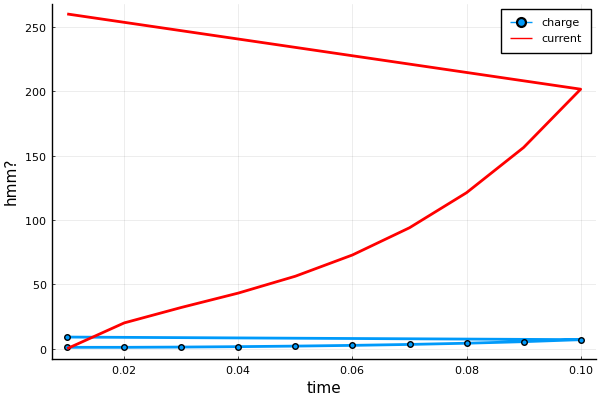

In [52]:
println("Use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.\n")
println("Term       Charge                  Current")
eulers_method(0.01, 200, 5, 10^-4, 0, 0.1, 0 ,1)

Use Calculus to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.

Time(s)       Charge                         Current
0.01           0.913515347581107       -15.941438633037038
0.02           0.707445557420788       -24.042908393785723
0.03           0.454623099922328       -25.57569478366272
0.04           0.21144849469842336       -22.456868580677916
0.05           0.01416404894540483       -16.725591461963113
0.06           -0.12037591885054927       -10.172280017090669
0.07           -0.1910456381744146       -4.130353039243053
0.08           -0.20744500731469034       0.5892768149474503
0.09           -0.18480723786936654       3.657406864598134
0.1           -0.13967208459371888       5.121104002833686

 Graphing the charge and current against time


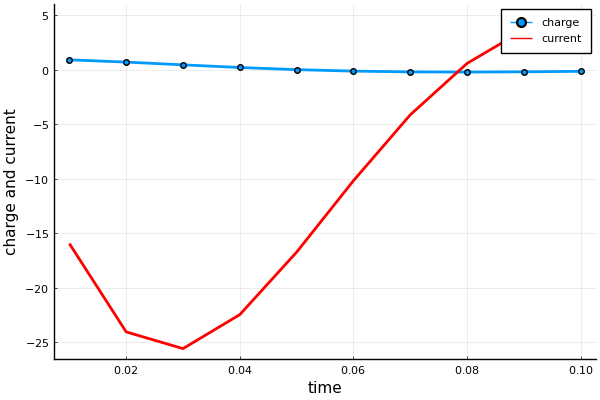

In [55]:
println("Use Calculus to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.\n")
println("Time(s)       Charge                         Current")
calculus_method(10)

### 2.) Evaluate exponential function (e^-5)
    a. e−x=1−x+x22−x33!+⋯ (di ko pa naaayos formatting di ako masyado marunong maglatex so search ko pa pano maya hehe)
    b. e−x=1ex=11+x+x22+x33!+⋯
Evaluate e−5 using two approaches and compare with the true value of 6.737947×10−3. Use 20 terms to evaluate each series and compute true and approximate relative errors as terms are added. Explain the reason if there are discrepancies in the errors.

In [13]:
function approach1(x, terms)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
    it to the true value using. Takes an input of the x (or the value to be exponentiated) and the number
    of terms=#
    true_value = exp(x) 
    approximation = ([1.0]) #array that will hold the terms, idk if there is an easier way
    println("Term #    Approximation               True Error          Relative Error")
    for i = 1:terms
        true_error = abs(true_value - approximation[i])
        relative_error = abs((true_error/true_value)*(100))
        println(i, "          ", approximation[i], "       ", true_error, "      ", relative_error,"%") #i wish i knew how to print it nicely
        push!(approximation, (approximation[i]+(x^i/factorial(i)))) #append new term to array for plotting later
        i += 1
    end
    graph_against_true_value(terms, approximation, true_value, 13, -13) #call graph function after idk
end

approach1 (generic function with 1 method)

In [14]:
function approach2(x, terms)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
    it to the true value =#
    true_value = exp(x) 
    x = abs(x) #ito ang pinagkaiba ng approach 1 at 2, positive lagi x dito
    approximation = ([1.0]) #array that will hold the terms, this is e^x
    approximation_1 = [(1.0)] #idk omg a separate array for plotting, this is 1/e^x
    println("Term #    Approximation               True Error          Relative Error")
    for i = 1:terms
        true_error = abs(true_value - 1/approximation[i])
        relative_error = abs((true_error/true_value)*(100))
        println(i, "          ", 1/approximation[i], "       ", true_error, "      ", relative_error,"%") #i wish i knew how to print it nicely
        push!(approximation, (approximation[i]+(x^i/factorial(i)))) #append new term to array for plotting later
        push!(approximation_1, 1/approximation[i])
        i += 1
    end
    
    graph_against_true_value(terms, approximation_1, true_value, 1, -0.1) #call graph function after 
end

approach2 (generic function with 1 method)

In [28]:
using Plots; pyplot()
function graph_against_true_value(terms, fx, true_value, upper_ylim, lower_ylim)
#= Graphs the approximations/terms by the number of terms and superimposes the true value. Takes
    in the number of terms, the array to be approximated, the true value to be superimposed as a
    horizontal line, and the upper and lower y limits of the graph=#
    println("\n Graphing the approximations against the true value")
    t = 1:terms #y-axis 
    true_plot = []
    plot(t, fx, linewidth=2, label="numerical approximation", markershape = :circle)
    for i = 0:terms-1 #make an array with a size of terms full of true value because idk how to plot a str8 line
        push!(true_plot, true_value)
    end
    plot!(t, true_plot, linewidth=2, color="red", label="true value") #plot str8 line of true value
    xlabel!("terms")
    ylabel!("hmm?")
end

graph_against_true_value (generic function with 1 method)

Estimating value of e^-5 using approach 1 (e^-x = 1 + x + x^2/2 + x^3/3! + ...)
True value of e^-5 = 0.006737946999085467

Term #    Approximation               True Error          Relative Error
1          1.0       0.9932620530009145      14741.31591025766%
2          -4.0       4.006737946999086      59465.26364103064%
3          8.5       8.493262053000915      126051.18523719013%
4          -12.333333333333332       12.340071280332417      183142.8962265111%
5          13.708333333333336       13.701595386334251      203349.70560311546%
6          -12.333333333333332       12.340071280332417      183142.8962265111%
7          9.368055555555557       9.361317608556472      138934.27196484437%
8          -6.132936507936506       6.139674454935592      91120.84817183812%
9          3.5551835317460334       3.548445584746948      52663.60191358842%
10          -1.827105379188711       1.8338433261877964      27216.648133870774%
11          0.8640390762786612       0.8573011292795757  

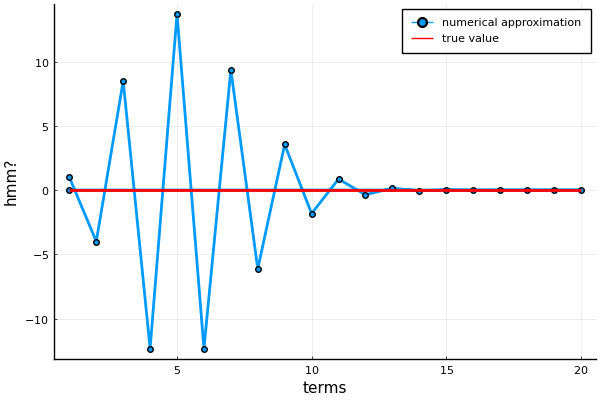

In [16]:
println("Estimating value of e^-5 using approach 1 (e^-x = 1 + x + x^2/2 + x^3/3! + ...)")
println("True value of e^-5 = ", exp(-5),"\n")

approach1(-5,20)

Estimating value of e^-5 using approach 2 (e^-x = 1/e^x =  1 / 1 + x + x^2/2 + x^3/3! + ...)
True value of e^-5 = 0.006737946999085467

Term #    Approximation               True Error          Relative Error
1          1.0       0.9932620530009145      14741.31591025766%
2          0.16666666666666666       0.15992871966758118      2373.5526517096096%
3          0.05405405405405406       0.04731610705496859      702.23329244636%
4          0.025423728813559324       0.018685781814473855      277.32159093875407%
5          0.015296367112810707       0.00855842011372524      127.01821660049958%
6          0.010938924339106653       0.004200977340021186      62.348031835088335%
7          0.008840321689483701       0.002102374690398234      31.202006941930332%
8          0.00777489818585709       0.0010369511867716228      15.389720146394248%
9          0.007230283266789742       0.0004923362677042749      7.30691808307633%
10          0.006959452863649537       0.00022150586456406995   

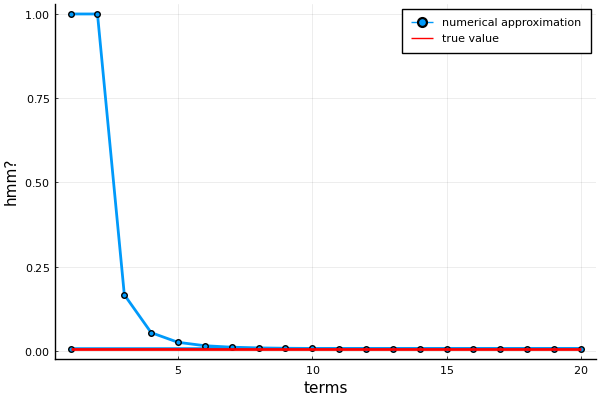

In [17]:
println("Estimating value of e^-5 using approach 2 (e^-x = 1/e^x =  1 / 1 + x + x^2/2 + x^3/3! + ...)")
println("True value of e^-5 = ", exp(-5),"\n")

approach2(-5,20)

### 3.) Evaluate MacLaurin series expansion for cos function (cos(pi/3))
##### MacLaurin series is given by:
\$cosx=1−x22+x44!−x66!+x88!−⋯\$

Starting with the simplest version, cosx=1, add terms one at a time to estimate cos(π3) . After each new term is added, compute the true and approximate percent relative errors. Use Julia to determine the true value. Add terms until the absolute value of the approximate error estimate falls below an error criterion conforming to two significant figures. Explain the reason if there are discrepancies in the errors.

In [20]:
function maclaurin_cos_expansion(x)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
    it to the true value =#
    true_value = cos(x) 
    e = ([1.0]) #array that will hold the terms, idk if there is an easier way
    true_error = 1; i = 1
    println("Term #    Approximation               True Error          Relative Error")
    while true_error > 0.000000000000001
        true_error = abs(true_value - e[i])
        relative_error = abs((true_error/true_value)*(100))
        println(i, "          ", e[i], "       ", true_error, "      ", relative_error,"%") #i wish i knew how to print it nicely
        push!(e, (e[i]+((((-1)^i)*(x^2i))/(factorial(big(2*i)))))) #append new term to array for plotting later
        i += 1
    end
    graph_against_true_value(i, e, true_value, 1.1, 0.4) #call graph function after idk
end

maclaurin_cos_expansion (generic function with 1 method)

Estimating value of cos(pi/3) using Mclaurin Series Expansion
True value of cos(pi/3) = 0.5000000000000001

Term #    Approximation               True Error          Relative Error
1          1.0       0.4999999999999999      99.99999999999996%
2          0.45168864438392464       0.04831135561607547      9.66227112321509%
3          0.501796201500181       0.001796201500180894      0.3592403000361787%
4          0.4999645653289127       3.543467108740872e-5      0.007086934217481742%
5          0.500000433432915       4.3343291489250646e-7      8.668658297850126e-5%
6          0.4999999963909432       3.609056886677564e-9      7.218113773355126e-7%
7          0.5000000000217777       2.1777579739534758e-11      4.355515947906951e-9%
8          0.49999999999990047       9.96425164601078e-14      1.9928503292021553e-11%
9          0.5000000000000004       3.3306690738754696e-16      6.661338147750938e-14%

 Graphing the approximations against the true value


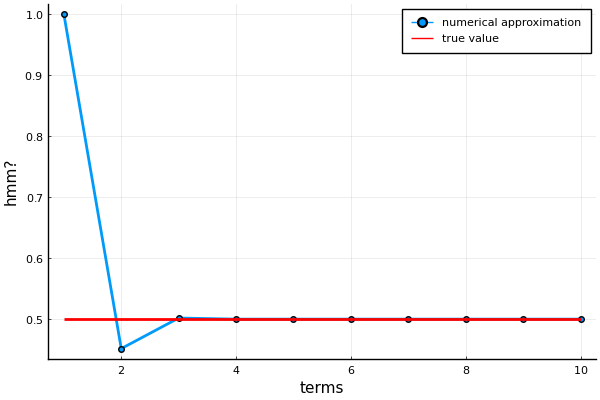

In [29]:
println("Estimating value of cos(pi/3) using Mclaurin Series Expansion")
println("True value of cos(pi/3) = ", cos((pi)/3) ,"\n")
maclaurin_cos_expansion((pi)/3)